In [1]:
from lightkurve import TessLightCurve
from lightkurve.search import open 
from lightkurve.correctors import RegressionCorrector
import lightkurve as lk
import numpy as np

In [2]:
def findOrbitRadius(periodInDays, M):
    G = 6.67408 * (10 ** (-11))
    pi = 3.141592653589
    sunMassKG = 1.989 * (10**30)
    massKG = M * sunMassKG
    periodInSec = periodInDays * 24 * 3600
    return ((periodInSec * periodInSec*G*massKG)/4*pi*pi) ** (1. / 3)
def metersToAU(d):
    return d/(1.495978707*(10**11))

In [14]:
pixels = open("tess2020186164531-s0027-0000000031998581-0189-s_tp.fits")
pixels.interact()

In [15]:
lc = open("tess2020212050318-s0028-0000000031998581-0190-s_lc.fits").PDCSAP_FLUX
lc = lc.remove_outliers(sigma=6).normalize().flatten()

In [11]:
#lc.query_solar_system_objects()

TIC 31998581
TIC 31998581 : Folding on period  0.61 d


<AxesSubplot:xlabel='Phase', ylabel='Normalized Flux'>

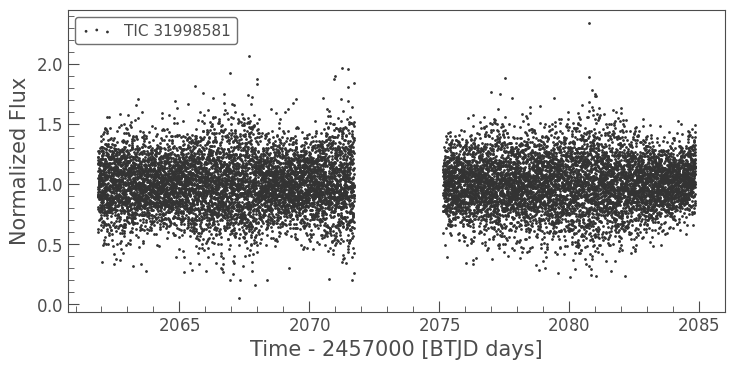

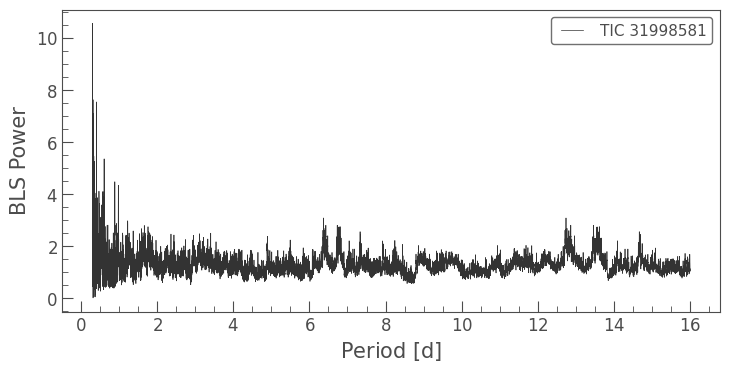

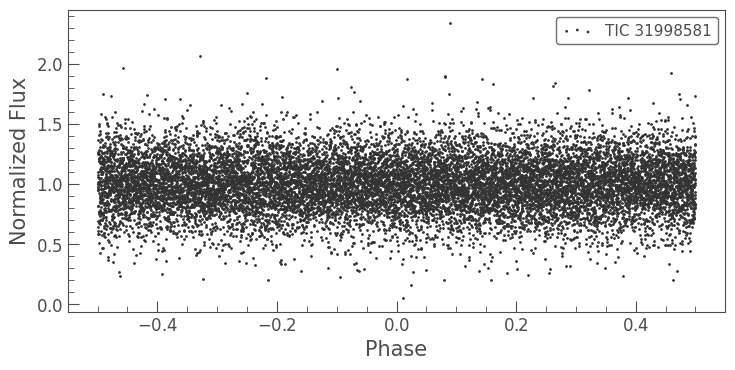

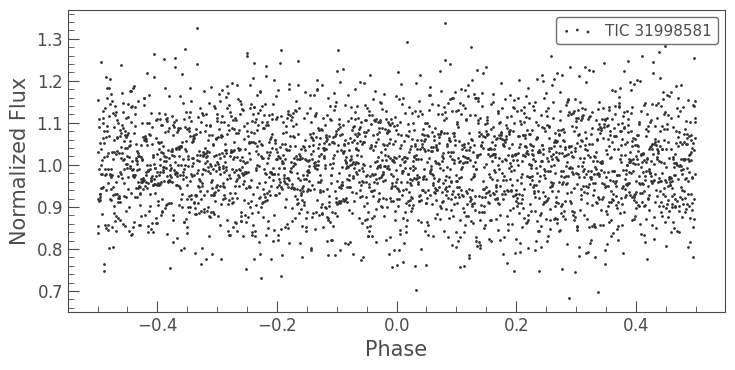

In [12]:
mask = (lc.time < 2072) | (lc.time > 2075)
print(lc.label)
masked_lc = lc[mask]
pg = lc.to_periodogram(method="bls", period=np.arange(0.3, 16, 0.001))
pg.to_table()
folded_lc = lc.fold(period=2*pg.period_at_max_power, t0=2080.1)
binned_lc = folded_lc.bin(binsize=5)  # Average 5 points per bin
lc.scatter()
pg.plot()
print(lc.label, ": Folding on period ", 2*pg.period_at_max_power)
folded_lc.scatter()
binned_lc.scatter()

#orbitRadiusInMeters =  findOrbitRadius(pg.period_at_max_power, 0.402118)
#print("Orbit in meters: ", orbitRadiusInMeters)
#orbitInAU = metersToAU(orbitRadiusInMeters)
#print("Orbit in AU: ", orbitInAU)